In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import seaborn as sns
%matplotlib inline 

# What is "Statistical Significance" and how do we test it?

Below is a small data set -- just seven patients -- where it *seems* that those who received a new treatment recoverer sooner.

In [2]:
experiment = Table().with_columns(
    "Patients", make_array("Control", "Control", "Control", "Treated", "Treated", "Treated", "Treated"),
    "Recovery Time (days)", make_array(22, 33, 40,19, 22, 25, 26)
)
experiment

Patients,Recovery Time (days)
Control,22
Control,33
Control,40
Treated,19
Treated,22
Treated,25
Treated,26


## Compare the means of the two groups

In [3]:
experiment.group("Patients", np.mean)

Patients,Recovery Time (days) mean
Control,31.6667
Treated,23


In [4]:
experiment.group("Patients", np.std)

Patients,Recovery Time (days) std
Control,7.4087
Treated,2.73861


## Plot the distributions

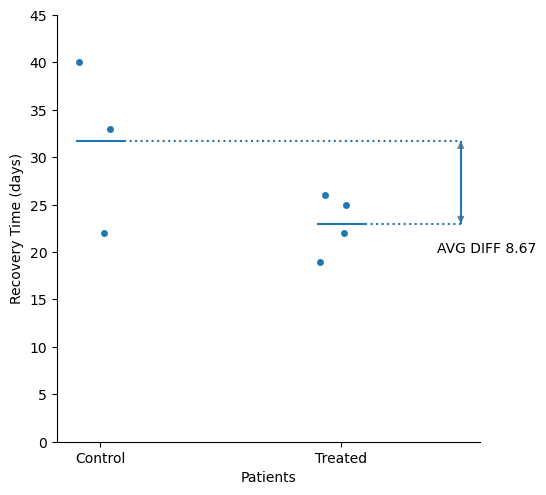

In [7]:
control_mean = 31.7
treated_mean = 23

sns.catplot(data=experiment.to_df(), x="Patients", y="Recovery Time (days)")
ax = plt.gca()
ax.set_ylim((0, 45))
ticks = ax.get_xticks()
w = 0.1
xmin, xmax = ax.get_xlim()
ax.hlines(control_mean, ticks[0]-w, ticks[0]+w)
ax.hlines(treated_mean, ticks[1]-w, ticks[1]+w)
ax.hlines(control_mean, ticks[0]+w, xmax, linestyles='dotted')
ax.hlines(treated_mean, ticks[1]+w, xmax, linestyles='dotted')
ax.vlines(xmax, treated_mean, control_mean,)
my_arrow = FancyArrowPatch(posA=(xmax, treated_mean),
                          posB=(xmax, control_mean), 
                          arrowstyle='<|-|>', color="0.5",
                          mutation_scale=10, shrinkA=0, shrinkB=0)
ax.add_artist(my_arrow)
ax.text(xmax-w, 20, "AVG DIFF 8.67")
plt.show();

It sure **seems** that the treated group recovered sooner, but there is that one annoying untreated patient who recovered just as quickly. What can we conclude? Did the treatment help?

## Hypothesis: The treatment helped patients recover more quickly.
## Null Hypothesis: The treatment did nothing.

Under the Null Hypothesis, the treatment did nothing. To test this, take our seven patients and randomly assign them to "treatment" and "control" and measure the different between the average recovery time of the two groups. We do this over and over and keep track of the differences between the averages.

We then compare difference in recovery times simulated assuming the treatment did nothing with the actual difference between the two groups.

In [8]:
experiment

Patients,Recovery Time (days)
Control,22
Control,33
Control,40
Treated,19
Treated,22
Treated,25
Treated,26


In [22]:
num_simulations = 100000
diff_means = 8.67
simulated_diffs = []
recovery = experiment.column("Recovery Time (days)")
for _ in np.arange(num_simulations):
    np.random.shuffle(recovery)
    new_diff = np.mean(recovery[:3]) - np.mean(recovery[3:])
    simulated_diffs.append(new_diff)
p_val_simulation = np.sum(np.abs(simulated_diffs) >= diff_means) / num_simulations
print(f"P-value from simulation: {p_val_simulation}")

P-value from simulation: 0.08536


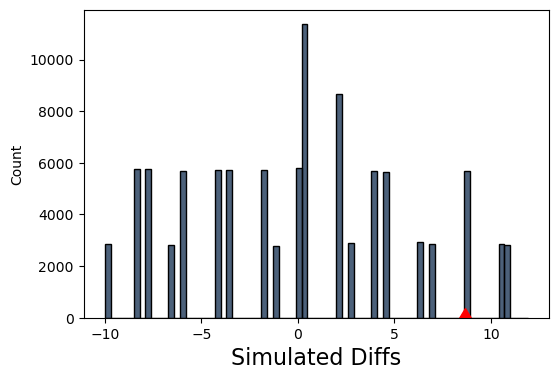

In [40]:
recovery_simulations = Table().with_columns("Simulated Diffs", simulated_diffs)
recovery_simulations.hist(bins=np.arange(-10,12,.3), density=False)
ax = plt.gca()
ax.plot(8.67, 0, 'rd', ms=10);

## What is the p-value?

The p-value is simple the probability you would see a difference as least as large as the one observed if, in truth, the treatment did nothing. That is to say, the null hypothesis is true. If this probably turns out to be very small, then we reject the null hypothesis and claim that the results of our experiement are "statistically significant."

## Our p-value was 0.085, is that small enough?
Good question! What we have found is that there is an 8.5% chance of getting our experimental result by chance, or about one chance in 12. Typically we say that p-value below 0.05 is highly likely to be significant, but we don't have real confidence in the result unless the p-value is less than 0.01, or one percent. 

## What can we conclude?
The results of our tiny experiment are suggestive, but not statistically significant. I hope you are all screaming that we need more data! This is part where you apply to NIH for another grant so you can conduct larger trials, prove your treatment works, create a start-up company, and get rich when you are acquired by big pharma. Just remember to give generously to Temple. :-)